In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
import plotly.offline as py
py.init_notebook_mode(connected=True) 


from sklearn.preprocessing import StandardScaler

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Pie plot of the target column distribution:

In [11]:
trace = go.Pie(labels = train_data["Survived"].value_counts().keys().tolist(),
               values =  train_data["Survived"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn Telco dataset ",
                        plot_bgcolor = "orange",
                        paper_bgcolor = "white",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [12]:
train_data.groupby("Survived").size()

Survived
0    549
1    342
dtype: int64

#### First i will make a copy of the original dataset and manipulate the copy. The original will stay intact

In [13]:
train_data_tidy = train_data.copy()

#### Verifying Cabin missing values:


In [14]:
percent_missing_values_cabin = train_data.Cabin.isna().sum()/len(train_data.Cabin)*100
print(f'Percent missing values: {round(percent_missing_values_cabin,2)} %.')
# percent_missing_values_cabin

Percent missing values: 77.1 %.


It is safe to remove the column because less than 30% of the data is existing.

In [15]:
train_data_tidy.drop("Cabin",axis = 1, inplace= True)

#### Analyzing Age column:

19.87% of the total Age column values are missing. From the missing values 58% are not survived from Pclass 3.
I will fill the missing values with the mean of the survived from Pclass 3. I will plot the new distribution of the Age column.

In [16]:
train_data_tidy.Age.isnull().sum()



177

In [17]:
percent_missing_values_age = train_data.Age.isnull().sum()/len(train_data.Age)*100
print(f'Percent missing values: {round(percent_missing_values_age,2)} %.')
# percent_missing_values_cabin

Percent missing values: 19.87 %.


In [18]:
missing_age_values = train_data_tidy[np.isnan(train_data_tidy.Age)]
missing_age_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


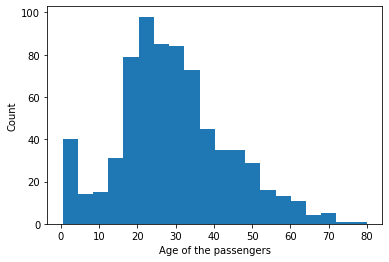

In [19]:
plt.hist(train_data_tidy.Age,bins="fd")
plt.xlabel("Age of the passengers")
plt.ylabel("Count")
plt.show()

In [20]:
""" x -> Missing Age values , not survived, from 3d class""" 

x = train_data_tidy[(train_data_tidy.Age.isnull()) & (train_data_tidy.Survived==0) & (train_data.Pclass ==3)]

In [21]:
print(f'Percent of  the missing age values who aren`t survived and who are from 3d Pclass : {round(len(x)/len(missing_age_values),2)*100} % .')

# round(len(x)/len(missing_age_values),2)

Percent of  the missing age values who aren`t survived and who are from 3d Pclass : 57.99999999999999 % .


In [22]:
x_present = train_data_tidy[(train_data_tidy.Age.notnull()) & (train_data_tidy.Survived==0) & (train_data.Pclass ==3)]

In [23]:
x_present

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q


In [24]:
x_present.Age.mean()

26.555555555555557

In [25]:
mean_age_of_not_survived = (train_data_tidy[(train_data_tidy.Age.notna()) & (train_data_tidy.Survived == 0)]).mean()
mean_age_of_not_survived

PassengerId    442.299528
Survived         0.000000
Pclass           2.485849
Age             30.626179
SibSp            0.525943
Parch            0.365566
Fare            22.965456
dtype: float64

In [26]:
train_data_tidy.Age=train_data_tidy.Age.fillna(mean_age_of_not_survived[3])

In [27]:
train_data.Age.mean()


29.69911764705882

In [28]:
train_data_tidy.Age.mode()

0    30.626179
dtype: float64

In [29]:
train_data_tidy.Age.isna().sum()

0

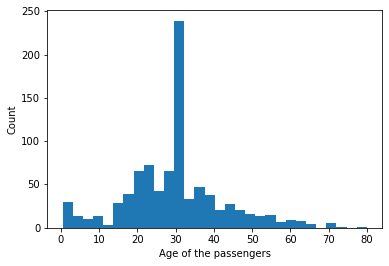

In [30]:
plt.hist(train_data_tidy.Age,bins ="fd")
plt.xlabel("Age of the passengers")
plt.ylabel("Count")
plt.show()

#### Analysing  Pclass column

Column contains 3 classes.Imbalanced distribution. 3d class represents 55.11% from all the passengers. Only 47 male susrvived from 3d class passengers. For differnce first class represents 24.24% of the total prassengers. 45 male survived from first class.

Column contains 3 classes.Imbalanced distribution

In [31]:
train_data_tidy.Pclass.unique()

array([3, 1, 2], dtype=int64)

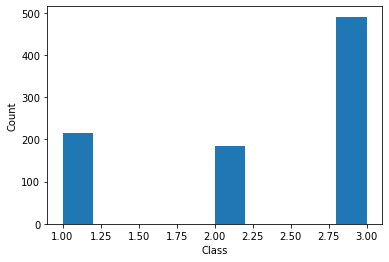

In [32]:
plt.hist(train_data_tidy.Pclass)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [33]:
pd.pivot_table(train_data_tidy,  values = "Survived", columns = "Sex", index = "Pclass")

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [34]:
third_class_passengers = len(train_data_tidy[train_data_tidy.Pclass == 3]) / len(train_data_tidy.Pclass)*100
print(f'Percent of the passengers in 3d class vs all: {round(third_class_passengers,2)}%.' )

Percent of the passengers in 3d class vs all: 55.11%.


In [35]:
survivde_male_3d_class = train_data_tidy[(train_data_tidy.Pclass==3) & (train_data_tidy.Sex =="male") & (train_data_tidy.Survived == 1)].shape
print(f"Number of survived male from 3d class {survivde_male_3d_class[0]}.")

Number of survived male from 3d class 47.


In [36]:
first_class_passengers = len(train_data_tidy[train_data_tidy.Pclass == 1]) / len(train_data_tidy.Pclass)*100
print(f'Percent of the passengers in 3d class vs all: {round(first_class_passengers,2)}%.' )

Percent of the passengers in 3d class vs all: 24.24%.


In [37]:
survivde_male_3d_class = train_data_tidy[(train_data_tidy.Pclass==1) & (train_data_tidy.Sex =="male") & (train_data_tidy.Survived == 1)].shape
print(f"Number of survived male from 1d class {survivde_male_3d_class[0]}.")

Number of survived male from 1d class 45.


#### PassengerId column and Name column

There are no missing values in both PassengerI and Name. I will keep a part Name column and i will remove it from the dataset. The original dataset will stay intact.

In [38]:
print(f'Number of missing value in PassengerId column {train_data_tidy.PassengerId.isnull().sum()}.' )

Number of missing value in PassengerId column 0.


In [39]:
print(f'Number of missing value in Name column {train_data_tidy.Name.isnull().sum()}.' )

Number of missing value in Name column 0.


In [40]:
name_column = train_data_tidy.Name
train_data_tidy.drop("Name", axis=1,inplace=True)

In [41]:
train_data_tidy.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [42]:
"""Last verification if any values is missing""" 

if len(train_data_tidy.PassengerId) == train_data_tidy.shape[0]:
    print("No missing values.")

No missing values.


#### Analysing Sex  column

Highly imbalanced data. Number of female passenger of board: 314 with 74.2 % survival rate. Number of male passengers of board: 577 with survival rate 18.89 %. Sex column is highly correlated with the Survival. Female survival rate is much times higher, the main reason it the rescue orders "female and kids"first. This observation is confirmed by th fact that the number distribution of the survived female is almost the same in the 3 Pclass.

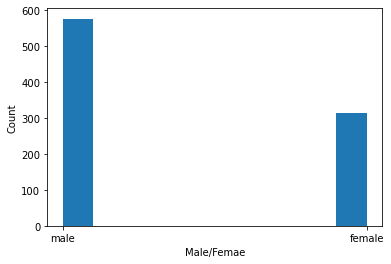

In [43]:
plt.hist(train_data_tidy.Sex)
plt.xlabel("Male/Femae")
plt.ylabel("Count")
plt.show()

In [44]:
pd.pivot_table(train_data_tidy,values = "Fare", columns="Sex", index= "Survived",aggfunc="count")

Sex,female,male
Survived,,
0,81,468
1,233,109


In [45]:
print(f'The total number of male passengers onboard : {train_data_tidy[train_data_tidy["Sex"] == "male"].shape[0]}.' )



The total number of male passengers onboard : 577.


In [46]:
train_data_tidy[train_data_tidy["Sex"] == "female"].shape[0]

314

In [47]:
print(f'The total number of female passengers onboard : {train_data_tidy[train_data_tidy["Sex"] == "female"].shape[0]}.' )

The total number of female passengers onboard : 314.


In [48]:
total_number_survived_male = train_data_tidy[(train_data_tidy["Sex"] == "male") & (train_data_tidy["Survived"]==1)].shape[0]
print(f'Total number of survived male {total_number_survived_male}.')

Total number of survived male 109.


In [49]:
total_number_survived_female = train_data_tidy[(train_data_tidy["Sex"] == "female") & (train_data_tidy["Survived"]==1)].shape[0]
print(f'Total number of survived female {total_number_survived_female}.')

Total number of survived female 233.


In [50]:
print(f'Survival rate among female passengers: {round(total_number_survived_female /(train_data_tidy[train_data_tidy["Sex"] == "female"].shape[0])*100,2)} %. ')

Survival rate among female passengers: 74.2 %. 


In [51]:
round(total_number_survived_male/(train_data_tidy[train_data_tidy["Sex"] == "male"].shape[0])*100,2)

18.89

In [52]:
print(f'Survival rate among male passengers: {round(total_number_survived_male/(train_data_tidy[train_data_tidy["Sex"] == "male"].shape[0])*100,2)} %. ')

Survival rate among male passengers: 18.89 %. 


In [53]:
total_number_survived_female_1st_class = train_data_tidy[(train_data_tidy["Sex"] == "female") & (train_data_tidy["Survived"]==1) & (train_data_tidy["Pclass"]==1)].shape[0]

In [54]:
print(f"Number of survived female from 1st class: {total_number_survived_female_1st_class }.")

Number of survived female from 1st class: 91.


In [55]:
total_number_survived_female_3d_class = train_data_tidy[(train_data_tidy["Sex"] == "female") & (train_data_tidy["Survived"]==1) & (train_data_tidy["Pclass"]==3)].shape[0]
print(f"Number of survived female from 3d class: {total_number_survived_female_3d_class}.")

Number of survived female from 3d class: 72.


In [56]:
pd.pivot_table(train_data_tidy,values= "Fare" ,index = "Survived", columns = ["Sex", "Pclass"], aggfunc="count")

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

#### Analysing Sibsp / siblings  on board  and Parch/ Number of Parents/Children Aboard columns

In [57]:
print(f"Mean sibling member of bord {round(train_data_tidy.SibSp.mean(),2)}")
print(f"Mean parents and children familly members of bord {round(train_data_tidy.Parch.mean(),2)}")

Mean sibling member of bord 0.52
Mean parents and children familly members of bord 0.38


In [58]:
train_data_tidy.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [59]:
train_data_tidy.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [60]:
train_data_tidy.SibSp.mean()

0.5230078563411896

In [61]:
train_data_tidy.Parch.mean()

0.38159371492704824

#### Analysing Ticket column:

No missing values in the columns. Only 76% of the passenger own a single tickets. The reason might be that the siblings,children and parents have a combinated ticket. This column will be irrelevant for the model, I will drop it.

In [62]:
len(train_data_tidy.Ticket.unique())

681

In [63]:
train_data_tidy.Ticket.isna().sum()

0

In [64]:
print(f'Percent of the unique ticket over all the passengers on board {round(len(train_data_tidy.Ticket.unique()) / len(train_data_tidy)*100)}%.')

Percent of the unique ticket over all the passengers on board 76%.


In [65]:
train_data_tidy.drop("Ticket",axis=1,inplace=True)

#### Analysing Fare column:

Survival enverselly propotionnal to the Fare rate. Only 27 customers paid Fare more that 150 USA and 68.97% of them survived. 838 passengers had paid Fare between 0 and 150 USA, only 36.14% of them survived.

In [66]:
train_data_tidy.Fare.mean()

32.2042079685746

In [67]:
train_data_tidy.Fare.min()

0.0

In [68]:
train_data_tidy.Fare.max()

512.3292

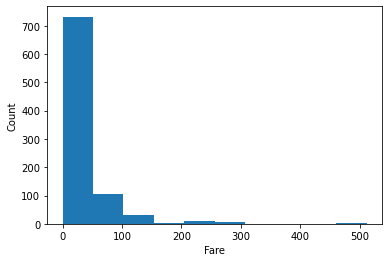

In [69]:
plt.hist(train_data_tidy.Fare)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [70]:
print(f'Number of passengers paid Fare more than 150 USD is {train_data_tidy[train_data_tidy["Fare"] > 150].shape[0]}.')

Number of passengers paid Fare more than 150 USD is 29.


In [71]:
print(f'Number of passengers paid Fare between 0 and 100 USD is {train_data_tidy[train_data_tidy["Fare"] <= 100].shape[0]}.')

Number of passengers paid Fare between 0 and 100 USD is 838.


In [72]:
print(f'Number of passenger paid Fare more that 150 USD who survived is {train_data_tidy[(train_data_tidy["Fare"] > 150) & (train_data_tidy["Survived"] ==1)].shape[0]}.')

Number of passenger paid Fare more that 150 USD who survived is 20.


In [73]:
survival_ratio_up_150_fare = round(train_data_tidy[(train_data_tidy["Fare"] > 150) & (train_data_tidy["Survived"] ==1)].shape[0]/train_data_tidy[train_data_tidy["Fare"] > 150].shape[0] *100,2)

In [74]:
print(f"Ration btw passengers with fare more that 150 USA and the survived among them is {survival_ratio_up_150_fare} %.")

Ration btw passengers with fare more that 150 USA and the survived among them is 68.97 %.


In [75]:
print(f'Number of  female passengers paid Fare more that 150 USD who survived is {train_data_tidy[(train_data_tidy["Fare"] > 150) & (train_data_tidy["Survived"] ==1) & (train_data_tidy["Sex"]=="female")].shape[0]}.')

Number of  female passengers paid Fare more that 150 USD who survived is 17.


In [76]:
train_data_tidy[(train_data_tidy["Fare"] < 150) & (train_data_tidy["Survived"] == 0)].shape[0] 

540

In [77]:
ratio_fare_less_150_survival = train_data_tidy[(train_data_tidy["Fare"] <150) & train_data["Survived"] ==1].shape[0]/len(train_data_tidy["Survived"] == 1)*100

In [78]:
print(f'Ratio btw passengers who did survived and passengers among them with Fare rate less than 150 :{round(ratio_fare_less_150_survival,2)}%.')

Ratio btw passengers who did survived and passengers among them with Fare rate less than 150 :36.14%.


####  Analysis of Embarked column:

Imbalanced data. Almost half of all the passenger embarked from "S" and the deadrate is inversely proportional.8% of the passengers embarked from 'S' did`t survived vs 8% from embarkment 'C' and 5% from 'Q'. This is highly correlated with the Fare rate.

In [79]:
train_data_tidy.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [80]:
train_data_tidy.Embarked.isna().sum()

2

In [81]:
nan_embarked_values = train_data_tidy[train_data_tidy["Embarked"].isna()]
nan_embarked_values

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [82]:
x = train_data_tidy[(train_data_tidy["Survived"] == 1) & (train_data_tidy["Sex"]=="female") & (train_data_tidy["Fare"] < 100 )]
print(f'Majority of  the female passenger who survived and paid Fare less than  100 USD embarked from {x.Embarked.mode()}.')

Majority of  the female passenger who survived and paid Fare less than  100 USD embarked from 0    S
dtype: object.


In [83]:
train_data_tidy["Embarked"].fillna("S", inplace=True)

In [84]:
train_data_tidy["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [85]:
train_data_tidy["Embarked"].isna().sum()

0

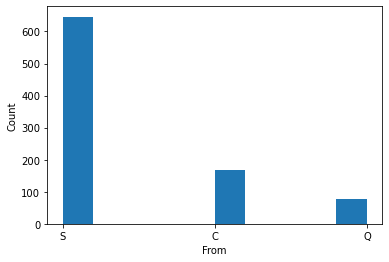

In [86]:
plt.hist(train_data_tidy["Embarked"])
plt.xlabel("From")
plt.ylabel("Count")
plt.show()

In [87]:
no_survival_rate_embarkement_C = train_data_tidy[(train_data_tidy["Survived"] == 0) &(train_data_tidy["Embarked"] == "C")].shape[0]/len(train_data_tidy["Embarked"] == "C")*100
no_survival_rate_embarkement_Q = train_data_tidy[(train_data_tidy["Survived"] == 0) &(train_data_tidy["Embarked"] == "Q")].shape[0]/len(train_data_tidy["Embarked"] == "Q")*100
no_survival_rate_embarkement_S= train_data_tidy[(train_data_tidy["Survived"] == 0) &(train_data_tidy["Embarked"] == "S")].shape[0]/len(train_data_tidy["Embarked"] == "S")*100
print(f"{round(no_survival_rate_embarkement_S)}% of the passengers embarked from 'S' did`t survived vs {round(no_survival_rate_embarkement_C )}% from embarkment 'C' and {round(no_survival_rate_embarkement_Q)}% from 'Q'.")

48% of the passengers embarked from 'S' did`t survived vs 8% from embarkment 'C' and 5% from 'Q'.


## Plot of all the relations between each column and the target "Survived"

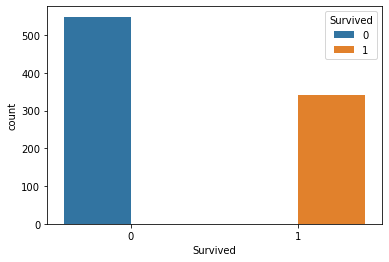

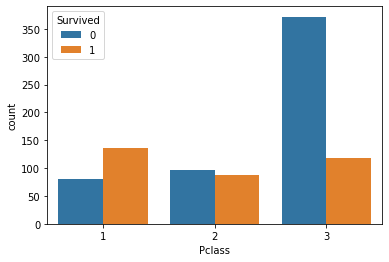

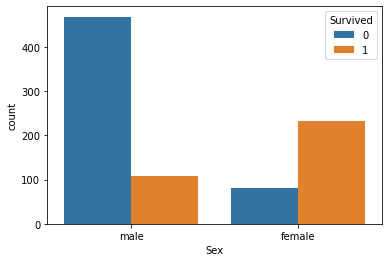

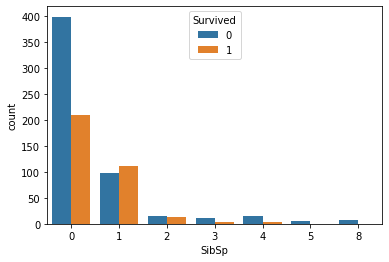

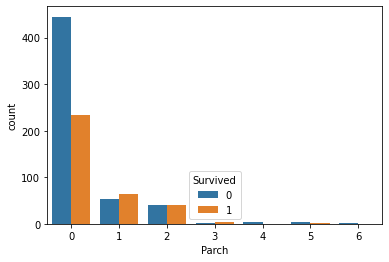

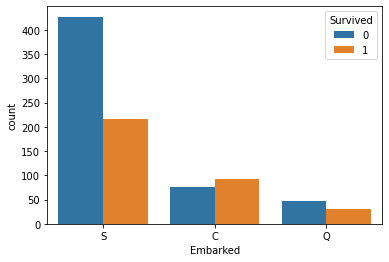

In [88]:
for i, j in enumerate(train_data_tidy.drop(["PassengerId", "Age", "Fare"],axis=1)):
    plt.figure(i)
    sns.countplot(data=train_data, x= j, hue="Survived")

In [89]:
train_data_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


# Preparing the dataset from the prediction model

In [90]:
train_data_modeling = train_data_tidy.copy()

In [91]:
train_data_tidy.to_csv("train_data_tidy.csv")

In [92]:
train_data_modeling[["Pclass", "SibSp","Parch" , "Embarked", "Sex"]] = train_data_modeling[["Pclass", "SibSp","Parch" , "Embarked","Sex"]].astype("category")

In [93]:
train_data_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
dtypes: category(5), float64(2), int64(2)
memory usage: 33.4 KB


In [94]:
train_data_modeling.Fare.mean()

32.2042079685746

In [95]:
train_data_modeling= pd.get_dummies(train_data_modeling)

In [96]:
train_data_modeling

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.000000,7.2500,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,38.000000,71.2833,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,26.000000,7.9250,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1,35.000000,53.1000,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,35.000000,8.0500,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,13.0000,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
887,888,1,19.000000,30.0000,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
888,889,0,30.626179,23.4500,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
889,890,1,26.000000,30.0000,1,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0


In [97]:
scaler= StandardScaler()
train_data_modeling[["Fare", "Age"]] = scaler.fit_transform(train_data_modeling[["Fare", "Age"]] )

In [98]:
train_data_modeling.head(20)

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,-0.606407,-0.502445,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,0.624364,0.786845,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,-0.298714,-0.488854,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1,0.393594,0.420730,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,0.393594,-0.486337,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
5,6,0,0.057146,-0.478116,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
6,7,0,1.855135,0.395814,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
7,8,0,-2.144871,-0.224083,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
8,9,1,-0.221791,-0.424256,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
9,10,1,-1.221793,-0.042956,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [99]:
train_data_modeling.to_csv("train_data_modeling.csv", index=None)

In [100]:
train_data_modeling.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [101]:
train_data_modeling.Fare.mean()

-4.37360585458395e-17